# Coloring bars

Demo of using color params for barchart-based visualizers

In [1]:
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

from yellowbrick.features import Rank1D
from yellowbrick.datasets import load_game
from yellowbrick.datasets import load_hobbies
from yellowbrick.datasets import load_concrete
from yellowbrick.datasets import load_occupancy
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.model_selection import CVScores
from yellowbrick.features import FeatureImportances
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.target import ClassBalance, FeatureCorrelation

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Rank1D

has a `color` param now

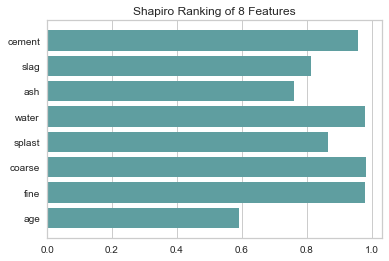

In [2]:
X, y = load_concrete()

visualizer = Rank1D(algorithm='shapiro', color=["cadetblue"])

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

## FreqDistVisualizer

has a `color` param now

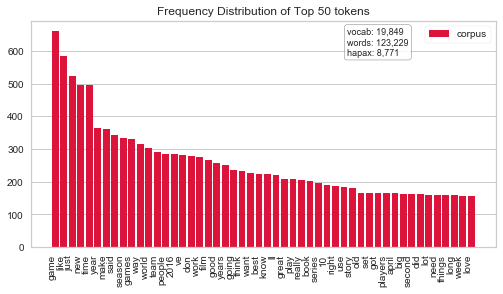

In [3]:
corpus = load_hobbies()
y = LabelEncoder().fit_transform(corpus.target)

vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(corpus.data)
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(
    features=features, orient='v', size=(600, 300), color=["crimson"]
)
visualizer.fit(docs)
visualizer.show()

## CVScores

has a `color` param now

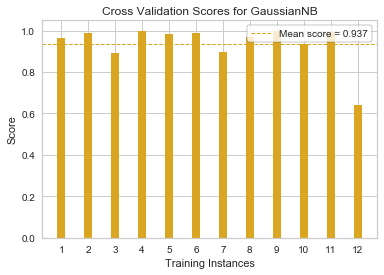

In [4]:
X, y = load_occupancy()

cv = StratifiedKFold(n_splits=12, random_state=42)
visualizer = CVScores(
    GaussianNB(), cv=cv, scoring='f1_weighted', color="goldenrod"
)

visualizer.fit(X, y)
visualizer.show()

## FeatureImportances

has a `colors` and a `colormap` param now; 
`colors` is for `stack==False` and `colormap` is for `stack==True`

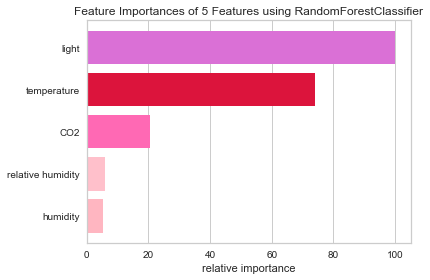

In [5]:
X, y = load_occupancy()

model = RandomForestClassifier(n_estimators=10)
colors = ["lightpink", "pink", "hotpink", "crimson", "orchid"]
viz = FeatureImportances(model, colors=colors)
viz.fit(X, y)
viz.show()

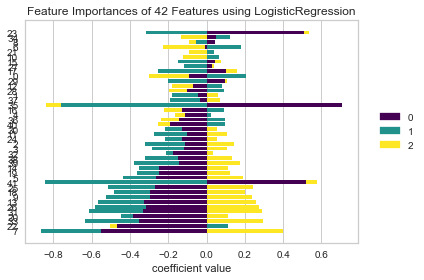

In [6]:
X, y = load_game()
X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

model = LogisticRegression(multi_class="auto", solver="liblinear")
viz = FeatureImportances(model, stack=True, relative=False, colormap="viridis")
viz.fit(X, y)
viz.show()

## MissingValuesBar

No handles with labels found to put in legend.


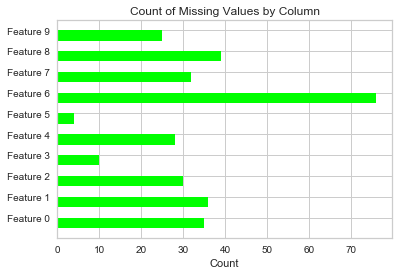

In [11]:
# Make a classification dataset
X, y = make_classification(
    n_samples=400, n_features=10, n_informative=2, n_redundant=3,
    n_classes=2, n_clusters_per_class=2, random_state=854
)

# Assign NaN values
X[X > 1.5] = np.nan
features = ["Feature {}".format(str(n)) for n in range(10)]

visualizer = MissingValuesBar(features=features, color="lime")

visualizer.fit(X)
visualizer.show()

## ClassBalance

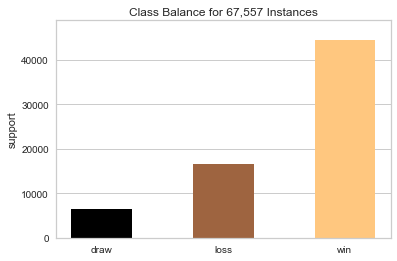

In [8]:
X, y = load_game()

visualizer = ClassBalance(
    labels=["draw", "loss", "win"],
    colormap="copper"
)

visualizer.fit(y)
visualizer.show()

## FeatureCorrelation

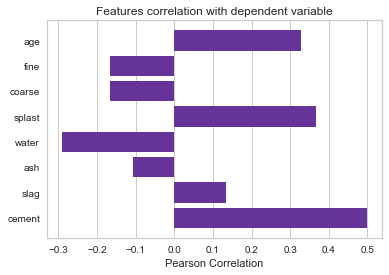

In [9]:
X, y = load_concrete(return_dataset=True).to_pandas()

# Create a list of the feature names
features = [
    "cement", "slag", "ash", "water", "splast", "coarse", "fine", "age"
]

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features, color="rebeccapurple")

visualizer.fit(X, y)
visualizer.show()